# Data extraction and analysis from social media platform Youtube by generating Youtube API key

## Problem statement
Videos are a fast growing medium where people communicate, share knowledge,
showcase skills etc. YouTube is one of the biggest platforms which hosts videos. The YouTube
platform hosts content from many different professions/arts/ cultures across the world.
People can express their opinion about the video in the form of likes, dislikes, comments
which are features provided by the YouTube platform which provides the information on the
sentiment about the video.
The assignment involves the steps on programmatic data extraction from YouTube on
which analysis can be conducted to understand various attributes related to a video.

step1 and 2:

1. create API key and Google API python client for the project
2. search movie of your choice and output props , ID, Snippet, Channel ID, Video Description, Channel Title, Video
Title

In [1]:
pip install --upgrade google-api-python-client --no-cache-dir

In [1]:
import googleapiclient.discovery
from googleapiclient.errors import HttpError
# import configparser
from pprint import pprint

# DO NOT COMMIT 'youtube_api_key' in secrets file, add to .gitignore
# config = configparser.ConfigParser()
# config.read('secrets.ini')
api_service_name = "youtube"
api_version = "v3"
# api_key = config['settings']['youtube_api_key']
api_key='REMOVED'
# init youTube client
youtube = googleapiclient.discovery.build(
    api_service_name, api_version, developerKey=api_key
)

# search videos def with region code and results as params
def search_videos(query):
    try:
        request = youtube.search().list(
            part="id",
            type='video',
            q=query
            # regionCode=region_code,
            # maxResults=max_results
        )
        response = request.execute()
        video_ids = [item['id']['videoId'] for item in response['items']]
        return video_ids
    except HttpError as e:
        print(f"An HTTP error {e.resp.status} occurred: {e.content}")
        return []

# get stats of the id's returned and return dataframe
def get_video_details(video_ids):
    try:
        request = youtube.videos().list(
            part='snippet,statistics',
            id=','.join(video_ids)
        )
        response = request.execute()

        video_details = []
        for item in response['items']:
            video_id = item['id']
            snippet =item['snippet']
            channel_id = item['snippet']['channelId']
            channel_title = item['snippet']['channelTitle']
            video_description = item['snippet']['description']
            video_title = item['snippet']['title']

            video_details.append({
                'video_id': video_id,
                'channel_id': channel_id,
                'channel_title': channel_title,
                'video_description': video_description,
                'video_title': video_title,
                'snippet' : snippet
            })

        return video_details
    except HttpError as e:
        print(f"An HTTP error {e.resp.status} occurred: {e.content}")
        return []

# combined function to get the required details
def cq_get_videos_details (query):
    video_ids = search_videos(query)
    return get_video_details(video_ids)


# pass params and save to csv
query = "good bad and the ugly"
video_details_df = cq_get_videos_details(query)
pprint(video_details_df)

[{'channel_id': 'UCGtAoge4_OloSgbXMyoh5vw',
  'channel_title': 'DR Koncerthuset',
  'snippet': {'categoryId': '10',
              'channelId': 'UCGtAoge4_OloSgbXMyoh5vw',
              'channelTitle': 'DR Koncerthuset',
              'defaultAudioLanguage': 'da',
              'description': '#TuvaSemmingsen #DNSO #FilmmusicLIVE\n'
                             '\n'
                             'The Good, the Bad and the Ugly \n'
                             'Composed by Ennio Morricone\n'
                             'Various flutes: Hans Ulrik, Russell Itani\n'
                             'Vocals: Tuva Semmingsen & Christine Nonbo '
                             'Andersen\n'
                             'Danish National Symphony Orchestra and Concert '
                             'Choir\n'
                             'Conducted by Sarah Hicks\n'
                             'Orchestral arrangement/adaption from original '
                             'recording: Martin Nygård Jørgen

Step2:
1. get top 50 videos and teh expected output video ID, title, no of views, no of likes,no of comments exported to CSV file

In [10]:
# import googleapiclient.discovery
# from googleapiclient.errors import HttpError
# import configparser
import pandas as pd

# # DO NOT COMMIT 'youtube_api_key' in secrets file, add to .gitignore
# config = configparser.ConfigParser()
# config.read('secrets.ini')
# api_service_name = "youtube"
# api_version = "v3"
# api_key = config['settings']['youtube_api_key']

# # init youTube client
# youtube = googleapiclient.discovery.build(
#     api_service_name, api_version, developerKey=api_key
# )

# search videos def with region code and maxresults as params
def search_videos(query, region_code='US', max_results=50):
    try:
        request = youtube.search().list(
            part="id",
            type='video',
            q=query,
            regionCode=region_code,
            maxResults=max_results
        )
        response = request.execute()
        video_ids = [item['id']['videoId'] for item in response['items']]
        return video_ids
    except HttpError as e:
        print(f"An HTTP error {e.resp.status} occurred: {e.content}")
        return []

# get stats of the id's returned and return dataframe
def get_video_details(video_ids):
    try:
        request = youtube.videos().list(
            part='snippet,statistics',
            id=','.join(video_ids)
        )
        response = request.execute()

        video_details = []
        for item in response['items']:
            video_id = item['id']
            title = item['snippet']['title']
            # converted the collected items to int (as they were object datatype)
            # removed pd.to_numeric conversions later in the code
            views = int(item['statistics'].get('viewCount', 0))
            likes = int(item['statistics'].get('likeCount', 0))
            comments = int(item['statistics'].get('commentCount', 0))

            video_details.append({
                'video_id': video_id,
                'title': title,
                'views': views,
                'likes': likes,
                'comments': comments
            })

        return pd.DataFrame(video_details)
    except HttpError as e:
        print(f"An HTTP error {e.resp.status} occurred: {e.content}")
        return []

# combined function to get the required details
def cq_get_videos_details (query, region_code='US', max_results=50):
    video_ids = search_videos(query, region_code, max_results)
    return get_video_details(video_ids)


# pass params and save to csv
query = "good bad and the ugly"
video_details_df = cq_get_videos_details(query)
print(video_details_df)
video_details_df.to_csv('youTube.csv',index=False)

       video_id                                              title      views  \
0   enuOArEfqGo  The Good, the Bad and the Ugly - The Danish Na...  140885498   
1   aJCSNIl2Pls  The Good, the Bad and the Ugly - The Final Due...   12726540   
2   J9EZGHcu3E8  The Good, the Bad and the Ugly • Main Theme • ...    6737895   
3   AFa1-kciCb4              The good the bad and the ugly - Theme   53802663   
4   C2HwN3jf_9w         western the.good.the bad and.the ugly 1966     228667   
5   XOl73VQOS9M        The Good, The Bad and The Ugly (Main Theme)     256226   
6   WCN5JJY_wiA  The Good, the Bad, and the Ugly Official Trail...    1792692   
7   00y8Oajzjs0  THE GOOD, THE BAD AND THE UGLY (1966) | The Bo...    2181238   
8   KITgh4aAYjA  The good the bad and the ugly of Kampala capit...        187   
9   vuwe_eXAG3Y  2024/2025 Official Kits: The Good, The Bad, An...      30308   
10  BoDr20XdYqc  Quentin Tarantino on The Good, the Bad and the...      47036   
11  UdHkDEKaA2g  The Good, t

step 3 :
1. Analyze the exported data obtained in 2.b and carry out the following

In [11]:
import pandas as pd

df=pd.read_csv('youTube.csv')
# print(df)

# Sort the data by top 10 comments in descending order and consider
# the video IDs and Titles of top 10 videos which have highest comments
# df['comments']=pd.to_numeric(df['comments'])
sort_by_comments_df = df.sort_values(by='comments',ascending=0)
top_10_videos_df=sort_by_comments_df.head(10)
print(top_10_videos_df)


       video_id                                              title      views  \
0   enuOArEfqGo  The Good, the Bad and the Ugly - The Danish Na...  140885498   
3   AFa1-kciCb4              The good the bad and the ugly - Theme   53802663   
32  PYI09PMNazw  The Ecstasy of Gold - Ennio Morricone ( The Go...   26831079   
38  cp6k5O3cJaA  Clint Eastwood REACTS to Figures of Himself #s...    8698687   
1   aJCSNIl2Pls  The Good, the Bad and the Ugly - The Final Due...   12726540   
12  pLgJ7pk0X-s  The Ukulele Orchestra of Great Britain - The G...   26267014   
21  ubVc2MQwMkg   The good, the bad and the ugly - Ecstasy of Gold   11388458   
24  qFuQMP9sjV4    The Good The Bad & The Ugly: Why Is It So Good?    2653188   
18  17N8_E40Nl0           The Good, The Bad and the Ugly - re:View    1336424   
14  tWGEveSseDg  The Good, The Bad and The Ugly-Ennio Morricone...   28950557   

      likes  comments  
0   1283627     56820  
3    505874     33926  
32   365722     20279  
38   509738 

Step 4 :
1. Use a suitable method to retrieve comments of those top 10 videos from 3.a. For
doing this, write a program to loop through each video id from 3.a and pass in the part
parameter set to "snippet", to retrieve basic details about the comments. Execute this
request and print the response using the pprint() method

In [12]:
# get comments
def get_video_comments(video_id, max_results=10):
    try:
        request = youtube.commentThreads().list(
            part='snippet',
            videoId=video_id,
            maxResults=max_results,
            # textFormat='plainText'
        )
        response = request.execute()

        comments = []

        for item in response['items']:
            comment_data = {
                'etag': item['etag'],
                'id': item['id'],
                'kind': item['kind'],
                'comments': item['snippet']['topLevelComment']['snippet']['textDisplay']
            }
            comments.append(comment_data)

        return comments
    except HttpError as e:
        print(f"An HTTP error {e.resp.status} occurred: {e.content}")
        return []

In [13]:
# use previous functions and top 10 for the comments details
def get_top_comments_for_videos(top_10_videos_df):
    top_video_ids = top_10_videos_df['video_id'].tolist()
    top_comments = {}

    for video_id in top_video_ids:
        comments = get_video_comments(video_id)
        top_comments[video_id]=comments


    # top_comments
    return top_comments

In [14]:
import json

query = "good bad and the ugly"
# top10_videos_df used from previous execution
top_comments = get_top_comments_for_videos(top_10_videos_df)
# printing the comments
pprint(top_comments)
#writing to a json file
with open('all_video_comments.json', 'w', encoding='utf-8') as json_file:
    json.dump(top_comments, json_file, indent=4)


{'17N8_E40Nl0': [{'comments': 'If you think this movie is great you need to '
                              'watch Once Upon a Time in the West. It might be '
                              'Leone&#39;s best movie.',
                  'etag': 'vKqi9mRiRDzZ-u3NEElMqD4uCIY',
                  'id': 'UgwBWLFVfG8uakUN3uR4AaABAg',
                  'kind': 'youtube#commentThread'},
                 {'comments': 'Rich Evans :  &quot;that&#39;s the story of For '
                              'A Fist Full Of Dollars&quot;.',
                  'etag': '-Xe2v8ISMkw4WtwgNJOFPyDnNww',
                  'id': 'UgwG2pl5GK0ou7cnqbV4AaABAg',
                  'kind': 'youtube#commentThread'},
                 {'comments': 'this is what the star wars bobba feet series '
                              'should have been , fist full of dollars in star '
                              'wars',
                  'etag': 'dfKmL8CG9IgKt9WKD63FD2kHFbc',
                  'id': 'UgzzagJRzrKSKC9_cmZ4AaABAg',
      

Step 5:
1. Write a function to get the likes vs views ratio of the top 10 videos obtained
in 3.a with the highest comments

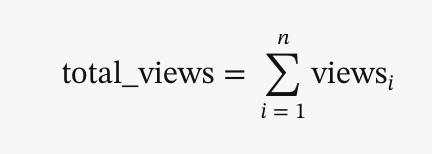

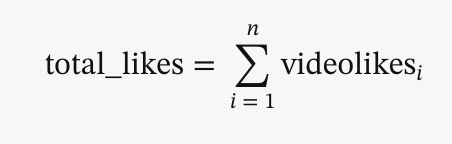

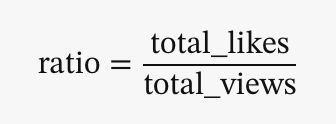

In [15]:
# based on the warning i got "A value is trying to be set on a copy of a slice from a DataFrame"
# used instruction as in https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
top10_videos_df=top_10_videos_df.copy()

def like_vs_view_ratio (top10_video_df):

    # top10_video_df.loc['likes']=pd.to_numeric(top10_video_df['likes'])
    # top10_video_df.loc['views']=pd.to_numeric(top10_video_df['views'])

    total_likes=top10_video_df['likes'].sum()
    total_views=top10_video_df['views'].sum()

    ratio =total_likes/total_views


    top10_video_df['ratio']=top10_video_df['likes'] / top10_video_df['views']


    return top10_video_df , ratio

In [19]:
ratio_df, ratio =like_vs_view_ratio(top10_videos_df)
print("ratio per row of like v/s views: ")
print(ratio_df)
print ('===============================')
print ('Total ratio of top 10 like v/s views')
print(ratio)


ratio per row of like v/s views: 
       video_id                                              title      views  \
0   enuOArEfqGo  The Good, the Bad and the Ugly - The Danish Na...  140885498   
3   AFa1-kciCb4              The good the bad and the ugly - Theme   53802663   
32  PYI09PMNazw  The Ecstasy of Gold - Ennio Morricone ( The Go...   26831079   
38  cp6k5O3cJaA  Clint Eastwood REACTS to Figures of Himself #s...    8698687   
1   aJCSNIl2Pls  The Good, the Bad and the Ugly - The Final Due...   12726540   
12  pLgJ7pk0X-s  The Ukulele Orchestra of Great Britain - The G...   26267014   
21  ubVc2MQwMkg   The good, the bad and the ugly - Ecstasy of Gold   11388458   
24  qFuQMP9sjV4    The Good The Bad & The Ugly: Why Is It So Good?    2653188   
18  17N8_E40Nl0           The Good, The Bad and the Ugly - re:View    1336424   
14  tWGEveSseDg  The Good, The Bad and The Ugly-Ennio Morricone...   28950557   

      likes  comments     ratio  
0   1283627     56820  0.009111  
3    5